# 8주 1강: Model Distributions, Continous Random Variables, Probability Density Function

Allen B. Downey의 http://thinkstats2.com 코드를 참조했습니다.

이번 강의는 연속 분포에 대해서 배우고, 일부의 모델 분포들을 코드를 통해 배워보도록 하겠습니다.

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy import stats
from scipy import special

## Exponential distribution

Exponential distribution의 pdf는 아래와 같습니다.

$f(x) = \lambda e ^{-\lambda x}$

PMF와 다르게, PDF의 경우는 1을 넘는 값을 가질 수도 있다는 사실을 알아두세요.

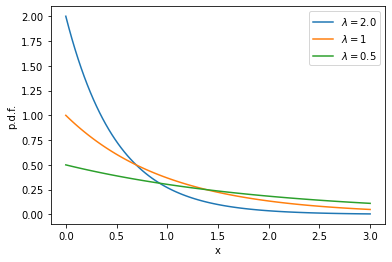

In [2]:
for lam in [2.0, 1, 0.5]:
    x = np.linspace(0, 3, 100) #np.linspace(a, b, n) = a와 b사이에 일정한 간격으로 n개의 요소를 만듭니다
    y = lam * np.exp(-1 * lam * x)
    plt.plot(x, y, label=f"$\lambda=${lam}")
    plt.legend()
    plt.xlabel("x")
    plt.ylabel("p.d.f.")
plt.show()
plt.close()

Exponential distribution의 cdf는 아래와 같습니다.

$F(x) =  1 - e^{-\lambda x}$


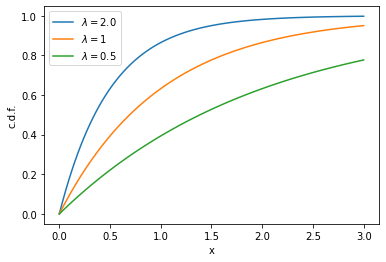

In [4]:
for lam in [2.0, 1, 0.5]:
    x = np.linspace(0, 3, 100) #np.linspace(a, b, n) = a와 b사이에 일정한 간격으로 n개의 요소를 만듭니다
    y = 1 - np.exp(-1 * lam * x)
    plt.plot(x, y, label=f"$\lambda=${lam}")
    plt.legend()
    plt.xlabel("x")
    plt.ylabel("c.d.f.")
plt.show()
plt.close()

현실 세계에서 연속적으로 일어나는 사건을 보고, 이 사이의 시간 간격을 재면 지수분포가 등장합니다. 사건이 대략적으로 균일하게 발생하는 것 같다면, 시간간격은 보통 지수분포를 띄게 됩니다.

교과서 예제를 가져와봅시다. 1997년 12월 18일 호주 브리즈번 1구에서 에서 44 명 신생아가 출생했습니다. 모든 44명의 신생아 출생 시간을 가져와봅시다. 교과서의 소스의 dat파일을 tsv로 변환한 `babyboom.tsv`파일을 불러옵시다

In [5]:
df = pd.read_csv("./babyboom.tsv", sep="\t")

In [6]:
def values2cdf(values):
    sorted_values = sorted(values)
    total = len(values)
    x = []
    y = []
    for i, value in enumerate(sorted_values):
        x.append(value)
        y.append(i/total)
    return x, y

In [7]:
def values2ccdf(values):
    sorted_values = sorted(values)
    total = len(values)
    x = []
    y = []
    for i, value in enumerate(sorted_values):
        x.append(value)
        y.append(1-i/total)
    return x, y

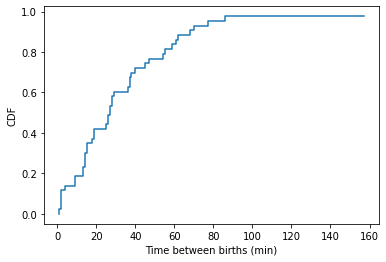

In [8]:
diffs = df.minutes.diff().dropna() # 각 출생 사이의 시간 간격을 재 봅시다. 
xval, cdf = values2cdf(diffs)
plt.step(xval, cdf)
plt.xlabel("Time between births (min)")
plt.ylabel("CDF")
plt.show()

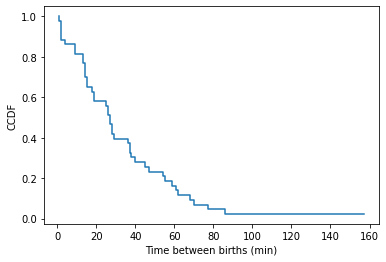

In [9]:
xval, ccdf = values2ccdf(diffs)
plt.step(xval, ccdf)
plt.xlabel("Time between births (min)")
plt.ylabel("CCDF")
plt.show()

expoential distribution은 df와 ccdf 모두 y를 log축으로 바꾸면 직선처럼 보입니다.

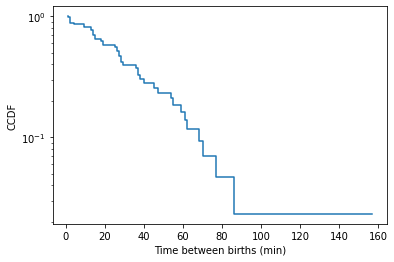

In [10]:
xval, ccdf = values2ccdf(diffs)
plt.step(xval, ccdf)
plt.xlabel("Time between births (min)")
plt.ylabel("CCDF")
plt.yscale("log")
plt.show()

Histogram을 통해서 pdf를 만들어봅시다.
pdf는 pmf와 다르게 bin size로 histogram을 한 번 더 나누어줘야 합니다.

In [11]:
def values2pdf(values, bins=10):
    import numpy as np
    tot = len(values)   
    hist, bins = np.histogram(values, bins=bins) 
    xval = bins[:-1] + 0.5 * (bins[1:] - bins[:-1]) # 두 bin 사이의 점을 고릅니다
    binsizes = (bins[1:] - bins[:-1]) # binsize가 uniform이 아니더라도 쓸 수 있도록
    pdf = (hist / tot) / binsizes
    return xval, pdf
    
def values2pmf(values, bins=10):
    import numpy as np
    tot = len(values)
    hist, bins = np.histogram(values, bins=bins) 
    xval = bins[:-1] + 0.5 * (bins[1:] - bins[:-1]) # 두 bin 사이의 점을 고릅니다
    return xval, hist/tot

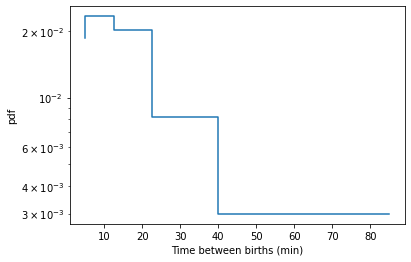

In [12]:
xval, pdf = values2pdf(diffs, [0, 10, 15, 30, 50, 120])
plt.step(xval, pdf)
plt.xlabel("Time between births (min)")
plt.ylabel("pdf")
plt.yscale("log")
plt.show()

## Gaussian distribution

Gaussian distribution의 pdf는 아래와 같습니다.

$f(x) = \frac{1}{\sigma\sqrt{\pi}}e^{-\frac{1}{2}(\frac{x-\mu}{\sigma})^2}$

PDF를 그려봅시다

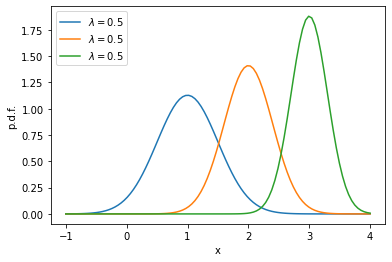

In [13]:
mus = [1.0, 2.0, 3.0]
sigmas = [0.5, 0.4, 0.3]
for mu, sigma in zip (mus, sigmas):
    x = np.linspace(-1, 4, 100)
    y = 1/(sigma*np.sqrt(np.pi)) * np.exp(-1/2 * ((x - mu)/sigma)**2)
    plt.plot(x, y, label=f"$\lambda=${lam}")
    plt.legend()
    plt.xlabel("x")
    plt.ylabel("p.d.f.")

c.d.f.는 아래와 같습니다.

$F(x) = \frac{1}{2}[1+erf(\frac{x-\mu}{\sigma\sqrt{2}})]$

여기서 erf는 error function을 말합니다 (https://en.wikipedia.org/wiki/Error_function)

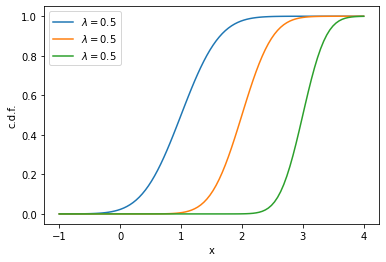

In [14]:
mus = [1.0, 2.0, 3.0]
sigmas = [0.5, 0.4, 0.3]
for mu, sigma in zip (mus, sigmas):
    x = np.linspace(-1, 4, 100)
    y = 1/2 * (1 + special.erf((x-mu)/(sigma*np.sqrt(2))))
    plt.plot(x, y, label=f"$\lambda=${lam}")
    plt.legend()
    plt.xlabel("x")
    plt.ylabel("c.d.f.")

항상 하던 것 처럼 preg 데이터를 불러옵시다

In [15]:
preg = pd.read_csv("./2002FemPreg.tsv", sep = "\t")
weights = preg.totalwgt_lb.dropna()

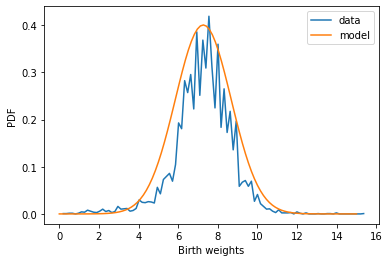

In [16]:
x, pdf = values2pdf(weights, 100)
plt.plot(x, pdf, label="data")
plt.legend()

mean = np.mean(weights)
std = np.sqrt(np.var(weights))
model_x = np.linspace(0, 15, 100)
model_pdf = 1/(std*np.sqrt(np.pi)) * np.exp(-1/2 * ((model_x - mean)/std)**2)
plt.plot(model_x, model_pdf, label="model")

plt.xlabel("Birth weights")
plt.ylabel("PDF")
plt.legend()
plt.show()

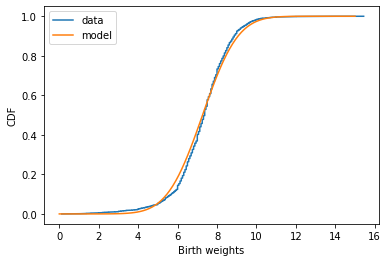

In [17]:
x, cdf = values2cdf(weights)
plt.plot(x, cdf, label="data")
plt.legend()

mean = np.mean(weights)
std = np.sqrt(np.var(weights))
model_x = np.linspace(0, 15, 100)
model_cdf =  1/2 * (1 + special.erf((model_x-mean)/(std*np.sqrt(2))))
plt.plot(model_x, model_cdf, label="model")

plt.xlabel("Birth weights")
plt.ylabel("CDF")
plt.legend()
plt.show()

조금 더 그래프를 개선하기 위해서 맨 위 아래의 1%정도를 잘라봅시다.

In [18]:
trimmed_weights = sorted(weights)[int(0.01*len(weights)):int((1-0.01)*len(weights))]

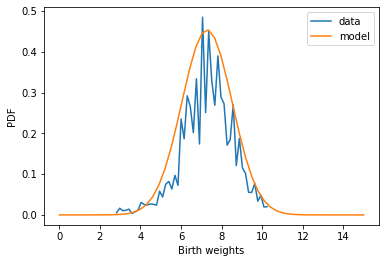

In [19]:
x, pdf = values2pdf(trimmed_weights, 50)
plt.plot(x, pdf, label="data")
plt.legend()

mean = np.mean(trimmed_weights)
std = np.sqrt(np.var(trimmed_weights))
model_x = np.linspace(0, 15, 50)
model_pdf = 1/(std*np.sqrt(np.pi)) * np.exp(-1/2 * ((model_x - mean)/std)**2)
plt.plot(model_x, model_pdf, label="model")

plt.xlabel("Birth weights")
plt.ylabel("PDF")
plt.legend()
plt.show()

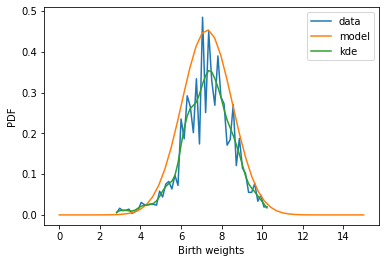

In [20]:
# kernel density estimation을 통해서 pdf를 조금 더 깔끔하게 보이게 만들 수도 있습니다.

x, pdf = values2pdf(trimmed_weights, 50)
plt.plot(x, pdf, label="data")
plt.legend()

mean = np.mean(trimmed_weights)
std = np.sqrt(np.var(trimmed_weights))
model_x = np.linspace(0, 15, 50)
model_pdf = 1/(std*np.sqrt(np.pi)) * np.exp(-1/2 * ((model_x - mean)/std)**2)
plt.plot(model_x, model_pdf, label="model")


# Scipy stats는 gaussian kernal을 사용하는 kde를 지원합니다.

estimator = stats.gaussian_kde(trimmed_weights)
K = estimator(x)
plt.plot(x, K, label="kde")
plt.legend()

plt.xlabel("Birth weights")
plt.ylabel("PDF")
plt.legend()
plt.show()

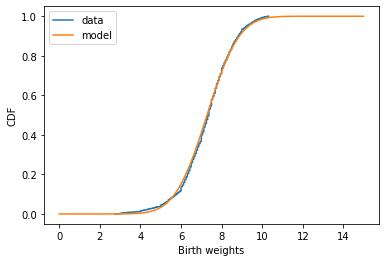

In [21]:
x, cdf = values2cdf(trimmed_weights)
plt.plot(x, cdf, label="data")
plt.legend()

mean = np.mean(trimmed_weights)
std = np.sqrt(np.var(trimmed_weights))
model_x = np.linspace(0, 15, 100)
model_cdf =  1/2 * (1 + special.erf((model_x-mean)/(std*np.sqrt(2))))
plt.plot(model_x, model_cdf, label="model")

plt.xlabel("Birth weights")
plt.ylabel("CDF")
plt.legend()
plt.show()

정규확률그림(A normal probability plot)은 Gaussian distribution이 이 데이터에 대해서 적합한지 눈으로 확인할 수 있는 방법입니다. 
1. 먼저 보고자 하는 sample과 동일한 수의 표준 정규 분포 변수를 만듭니다.
2. 두 변수 리스트를 오른차순 정렬해서 쌍을 만듭니다. 
3. 그리고 그 각각을 x축과 y축의 값으로 그래프를 그립니다. 

이 방법을 사용하면 normal distribution에서 나온 데이터는 그래프상에서 직선으로 보입니다. 실제로 Gaussian random number가 직선으로 보이는지 확인해봅시다.

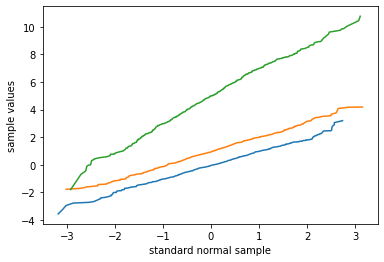

In [22]:
n = 1000
mus = [0, 1, 5]
sigmas = [1, 1, 2]

for mu, sigma in zip(mus, sigmas):
    std_sample = np.random.normal(0, 1, n) # 표준 정규 분포
    sample = np.random.normal(mu, sigma, n)
    plt.plot(sorted(std_sample), sorted(sample))

plt.xlabel("standard normal sample")
plt.ylabel("sample values")
plt.show()

이제 birth weights에 대해서 같은 분석을 해 봅시다.

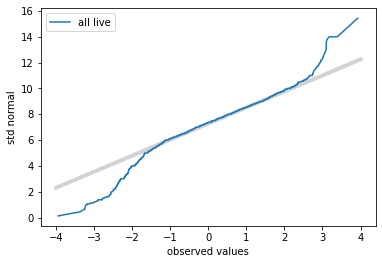

In [23]:
mean = np.mean(trimmed_weights)
std = np.sqrt(np.var(trimmed_weights))

# Mudel distribution의 Guideline을 그려봅시다
xs = [-4, 4]
guide_xs = np.sort(xs)
guide_ys = mean + std * guide_xs
plt.plot(guide_xs, guide_ys, color="lightgrey", linewidth=4)

sample_xs = np.random.normal(0, 1, len(weights))
plt.plot(sorted(sample_xs), sorted(weights), label="all live")
    
plt.xlabel("observed values")
plt.ylabel("std normal")
plt.legend()
plt.show()

약간의 오차가 보이고, 양 끝단에서 잘 맞지 않는 것을 알 수 있습니다.
조산의 경우 때문에 그럴 가능성이 있으니, 37주 이후에 태어난 아이만 가지고 다시 분석해봅시다.

In [23]:
full_term = preg[preg.prglngth >= 37]
term_weights = full_term.totalwgt_lb.dropna()

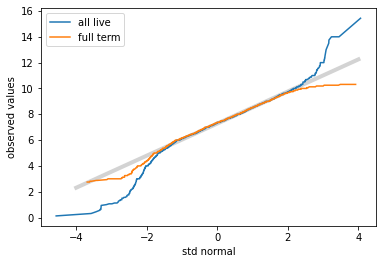

In [25]:
mean = np.mean(trimmed_weights)
std = np.sqrt(np.var(trimmed_weights))

# Mudel distribution의 Guideline을 그려봅시다
xs = [-4, 4]
guide_xs = np.sort(xs)
guide_ys = mean + std * guide_xs
plt.plot(guide_xs, guide_ys, color="lightgrey", linewidth=4)

sample_xs = np.random.normal(0, 1, len(weights))
plt.plot(sorted(sample_xs), sorted(weights), label="all live")

sample_xs2 = np.random.normal(0, 1, len(trimmed_weights))
plt.plot(sorted(sample_xs2), sorted(trimmed_weights), label="full term")

plt.xlabel("std normal")
plt.ylabel("observed values")
plt.legend()
plt.show()

훨씬 더 정확해짐을 알 수 있습니다. 그래도 오차는 있네요. 원래 Real data가 그렇습니다.

## Lognormal distribution

lognormal 분포는 값에 log를 취하는 경우 gaussian을 따라가는 분포를 말합니다.

lognormal의 대표적인 예로 성인의 몸무게를 들 수 있습니다. BRFSS는 Behavioral Risk Factor Surveillance System의 약자로 CDC에서 전화로 조사한 건강 관련 기초 설문조사입니다. 

In [26]:
df = pd.read_csv("./BRFSS.tsv", sep="\t")
weights = df.wtkg2.dropna()

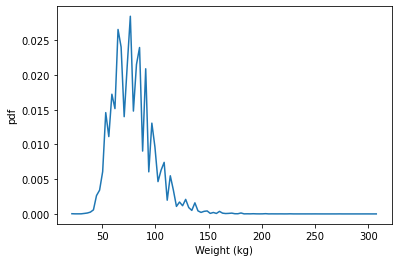

In [27]:
# pdf를 그려봅시다
x, pdf = values2pdf(weights, 100)
plt.plot(x, pdf)
plt.xlabel("Weight (kg)")
plt.ylabel("pdf")
plt.show()
plt.close()

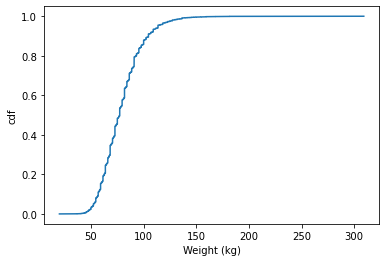

In [27]:
# cdf를 그려봅시다
x, cdf = values2cdf(weights)
plt.plot(x, cdf)
plt.xlabel("Weight (kg)")
plt.ylabel("cdf")
plt.show()
plt.close()

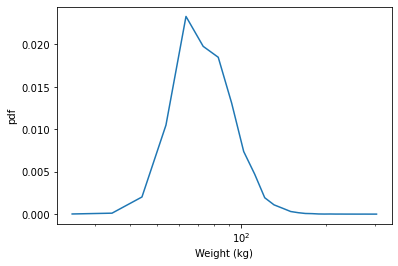

In [28]:
# xscale을 log로 바꾸면 gaussian distribution같이 보입니다.
# pdf를 그려봅시다
x, pdf = values2pdf(weights, 30)
plt.plot(x, pdf)
plt.xlabel("Weight (kg)")
plt.ylabel("pdf")
plt.xscale("log")
plt.show()
plt.close()

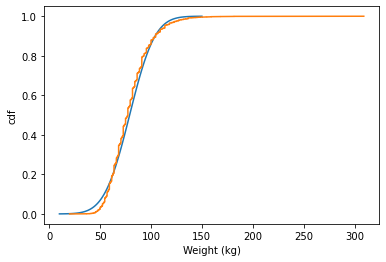

In [29]:
# cdf를 그려봅시다
# Gaussian model과는 잘 맞지 않는 것을 알 수 있습니다.
x, cdf = values2cdf(weights)

mean = np.mean(weights)
std = np.sqrt(np.var(weights))

model_x = np.linspace(10, 150, 100)
model_cdf =  1/2 * (1 + special.erf((model_x-mean)/(std*np.sqrt(2))))

plt.plot(model_x, model_cdf, label="model")

plt.plot(x, cdf)
plt.xlabel("Weight (kg)")
plt.ylabel("cdf")
plt.show()
plt.close()

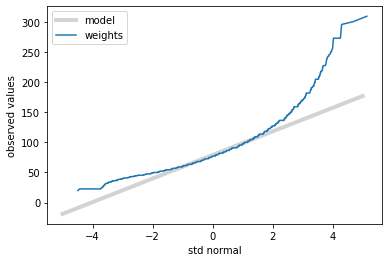

In [30]:
# Normal Probability Plot으로도 잘 맞지 않는 것을 확인할 수 있습니다.

xs = [-5, 5]
mean = np.mean(weights)
std = np.sqrt(np.var(weights))

guide_xs = np.sort(xs)
guide_ys = mean + std * guide_xs
plt.plot(guide_xs, guide_ys, color="lightgrey", linewidth=4, label="model")

sample_xs = np.random.normal(0, 1, len(weights))
plt.plot(sorted(sample_xs), sorted(weights), label="weights")

plt.xlabel("std normal")
plt.ylabel("observed values")
plt.legend()
plt.show()

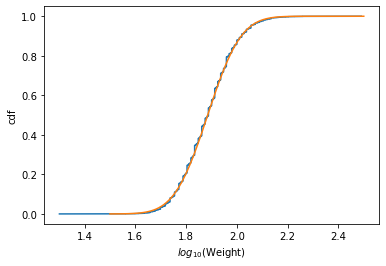

In [31]:
# log weight를 활용해서 이 분포가 log normal인지 테스트 해 봅시다.
# 먼저 CDF로 테스트 해 보겠습니다.

log10_weights = np.log10(weights)
x, cdf = values2cdf(log10_weights)

mean = np.mean(log10_weights)
std = np.sqrt(np.var(log10_weights))

model_x = np.linspace(1.5, 2.5, 100)
model_cdf =  1/2 * (1 + special.erf((model_x-mean)/(std*np.sqrt(2))))

plt.plot(x, cdf, label="data")
plt.plot(model_x, model_cdf, label="model")

plt.xlabel("$log_{10}$(Weight)")
plt.ylabel("cdf")
plt.show()
plt.close()

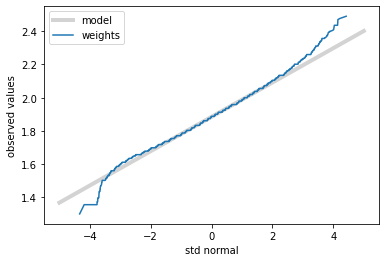

In [32]:
# Normal Probability Plot으로 확인해봅시다.

xs = [-5, 5]
log10_weights = np.log10(weights)
x, cdf = values2cdf(log10_weights)

mean = np.mean(log10_weights)
std = np.sqrt(np.var(log10_weights))

guide_xs = np.sort(xs)
guide_ys = mean + std * guide_xs
plt.plot(guide_xs, guide_ys, color="lightgrey", linewidth=4, label="model")

sample_xs = np.random.normal(0, 1, len(log10_weights))
plt.plot(sorted(sample_xs), sorted(log10_weights), label="weights")

plt.xlabel("std normal")
plt.ylabel("observed values")
plt.legend()
plt.show()

# 훨씬 잘 맞는 것을 알 수 있습니다

## Pareto distribution / Power-law distribution
Pareto distribution은 아래와 같이 정의됩니다.

p.d.f. $ f(x) = \frac{\alpha x_{min} ^{\alpha}}{x^{\alpha+1}} $

c.d.f. $ F(x) = 1 - (\frac{x_{min}}{x})^{\alpha}$

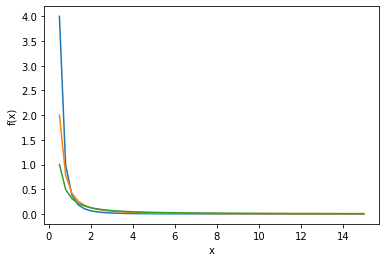

In [33]:
# PDF를 그려봅시다
xmin = 0.5
for alpha in [2.0, 1.0, 0.5]:
    model_x = np.linspace(0.5, 15, 50)
    model_pdf = alpha * (xmin ** alpha) / (model_x)**(alpha+1)
    plt.plot(model_x, model_pdf, label=alpha)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.show()

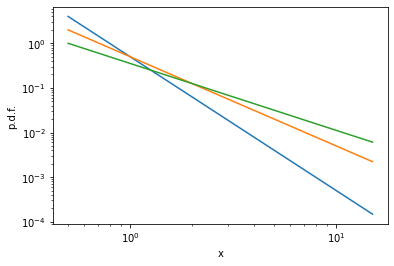

In [34]:
# log-log plot에서 직선같이 보이는 특징을 가졌습니다.
xmin = 0.5
for alpha in [2.0, 1.0, 0.5]:
    model_x = np.linspace(0.5, 15, 50)
    model_pdf = alpha * (xmin ** alpha) / (model_x)**(alpha+1)
    plt.plot(model_x, model_pdf, label=alpha)
plt.xlabel("x")
plt.ylabel("p.d.f.")
plt.xscale("log")
plt.yscale("log")
plt.show()

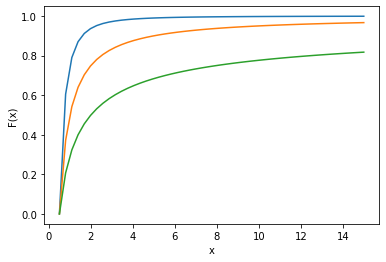

In [35]:
# CDF를 그려봅시다
xmin = 0.5
for alpha in [2.0, 1.0, 0.5]:
    model_x = np.linspace(0.5, 15, 50)
    model_cdf = 1 - (xmin ** alpha) / (model_x)**(alpha)
    plt.plot(model_x, model_cdf, label=alpha)
plt.xlabel("x")
plt.ylabel("F(x)")
plt.show()

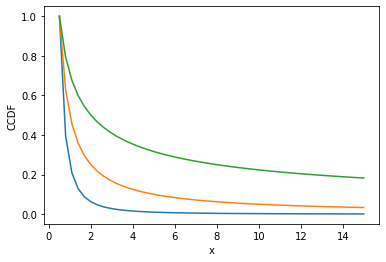

In [36]:
# Pareto 분포를 설명하는 데에는 CDF보다 CCDF가 더 적합합니다. CCDF는 1-CDF로 정의합니다
xmin = 0.5
for alpha in [2.0, 1.0, 0.5]:
    model_x = np.linspace(0.5, 15, 50)
    model_cdf = 1 - (xmin ** alpha) / (model_x)**(alpha)
    plt.plot(model_x, 1 - model_cdf, label=alpha)
plt.xlabel("x")
plt.ylabel("CCDF")
plt.show()
plt.close()

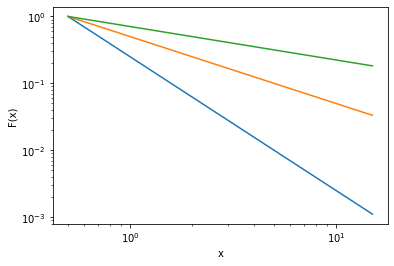

In [37]:
# CCDF또한 log-log에서 직선으로 보입니다.
xmin = 0.5
for alpha in [2.0, 1.0, 0.5]:
    model_x = np.linspace(0.5, 15, 50)
    model_cdf = 1 - (xmin ** alpha) / (model_x)**(alpha)
    plt.plot(model_x, 1 - model_cdf, label=alpha)
plt.xlabel("x")
plt.ylabel("F(x)")
plt.xscale("log")
plt.yscale("log")
plt.show()
plt.close()

# 이 CCDF에서의 기울기가 exponent alpha입니다.
# 보통 Pareto 분포라고 말을 할 때는, CCDF의 exponent를 alpha라고 하고
# power-law인 경우는, CCDF의 exponent가 alpha+1 으로 정의합니다.
# 두개는 완전히 동등한 분포이지만, 분야와 경우에 따라 다르게 부르고 다른 notation을 가집니다.

Pareto 분포가 나오는 대표적인 경우로는 도시들의 인구 분포를 들 수 있습니다.

`PEP_2012_PEPANNRES_with_ann.tsv` 파일을 불러와서 분석해 봅시다

이 파일은 2012년 미국의 도시와 마을들의 인구 분포를 나타냅니다. 

In [38]:
pops = pd.read_csv("./PEP_2012_PEPANNRES_with_ann.tsv").Populations
print('Number of cities/towns', len(pops))

Number of cities/towns 19516


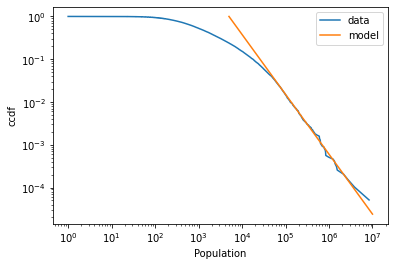

In [39]:
# cdf를 그려봅시다
# Gaussian model과는 잘 맞지 않는 것을 알 수 있습니다.
x, ccdf = values2ccdf(pops.values)
plt.plot(x, ccdf, label="data")

# model을 plot 해 봅시다
alpha = 1.4
xmin = 5000
model_x = np.linspace(xmin, 1e07, 100)
model_ccdf = (xmin ** alpha) / (model_x)**(alpha)
plt.plot(model_x, model_ccdf, label="model")
# 이 Exponent를 실제로 구하는 법은 Maximum-likelihood estimation을 배우면 알게 됩니다.

plt.xlabel("Population")
plt.ylabel("ccdf")
plt.xscale("log")
plt.yscale("log")
plt.legend()
plt.show()
plt.close()

#tail에 대해서 잘 맞는 것을 알 수 있습니다.

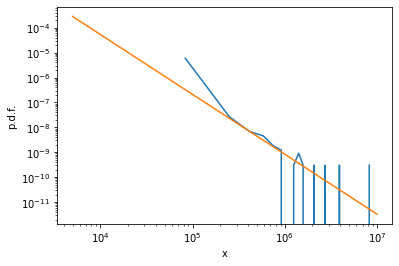

In [40]:
# pdf를 볼까요?
x, pdf = values2pdf(pops.values, 50)
plt.plot(x, pdf, label="data")

xmin = 5000
alpha = 1.4
model_x = np.linspace(xmin, 1e07, 100)
model_pdf = alpha * (xmin ** alpha) / (model_x)**(alpha+1)
plt.plot(model_x, model_pdf, label=alpha)

plt.xlabel("x")
plt.ylabel("p.d.f.")
plt.xscale("log")
plt.yscale("log")
plt.show()

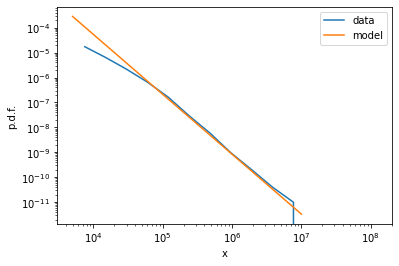

In [41]:
# 잘 맞지 않는 것 처럼 보입니다. 
# 이유는 분포가 불균일하기 때문에, bin을 균등하게 나누면 제대로 보지 못하기 때문입니다.
# x값에 따라 bin 사이즈를 2배씩 키우는 식으로 bin을 나눠봅시다.

x, pdf = values2pdf(pops.values, [5000 * 2**x for x in range(16)]) 
plt.plot(x, pdf, label="data")

xmin = 5000
alpha = 1.4
model_x = np.linspace(xmin, 1e07, 100)
model_pdf = alpha * (xmin ** alpha) / (model_x)**(alpha+1)
plt.plot(model_x, model_pdf, label="model")

plt.xlabel("x")
plt.ylabel("p.d.f.")
plt.xscale("log")
plt.yscale("log")
plt.legend()
plt.show()

Real data에서 power-law와 log-normal을 구분하는 것은 어렵습니다 

참조: https://epubs.siam.org/doi/abs/10.1137/070710111

저도 이것으로 논문을 하나 썼습니다: https://arxiv.org/abs/1810.08809 

이 논문은 아직 제 자리를 찾지 못해서 구천을 떠돌고 있습니다 -_-

lognormal이 더 잘 맞을지 모르니 lognormal도 한 번 테스트를 해 봅시다. 

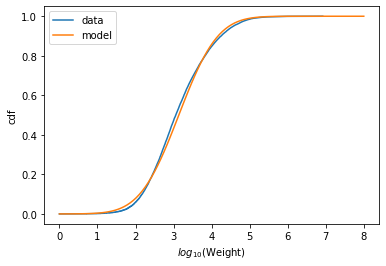

In [42]:
# log weight를 활용해서 이 분포가 log normal인지 테스트 해 봅시다.
# 먼저 CDF로 테스트 해 보겠습니다.

log10_pops = np.log10(pops)
x, cdf = values2cdf(log10_pops)

mean = np.mean(log10_pops)
std = np.sqrt(np.var(log10_pops))

model_x = np.linspace(0, 8, 100)
model_cdf =  1/2 * (1 + special.erf((model_x-mean)/(std*np.sqrt(2))))

plt.plot(x, cdf, label="data")
plt.plot(model_x, model_cdf, label="model")

plt.xlabel("$log_{10}$(Weight)")
plt.ylabel("cdf")
plt.legend()
plt.show()
plt.close()

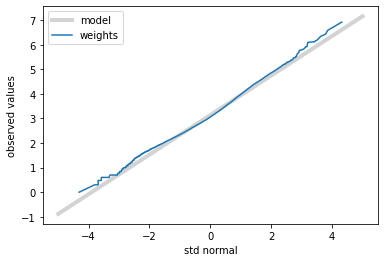

In [43]:
# Normal Probability Plot으로 확인해봅시다.

xs = [-5, 5]
log10_pops = np.log10(pops)
x, cdf = values2cdf(log10_pops)

mean = np.mean(log10_pops)
std = np.sqrt(np.var(log10_pops))

guide_xs = np.sort(xs)
guide_ys = mean + std * guide_xs
plt.plot(guide_xs, guide_ys, color="lightgrey", linewidth=4, label="model")

sample_xs = np.random.normal(0, 1, len(log10_pops))
plt.plot(sorted(sample_xs), sorted(log10_pops), label="weights")

plt.xlabel("std normal")
plt.ylabel("observed values")
plt.legend()
plt.show()

# Tail에서는 조금 덜 맞고, 중간 부분에서는 비슷한 것을 알 수 있습니다.
# lognormal이라고 생각하면 tail은 모델 예측값보다 실제 도시가 더 크다는 뜻이겠네요.

## Moments

실제 변수에서 Raw moments는 power의 평균으로 정의할 수 있습니다. 

In [44]:
def RawMoment(xs, k):
    return sum(x**k for x in xs) / len(xs)

In [45]:
# BRFSS를 다시 불러옵시다
df = pd.read_csv("./BRFSS.tsv", sep="\t")
female = df[df.sex==2]
female_heights = female.htm3.dropna()
mean, std = female_heights.mean(), female_heights.std()
mean, std

(163.22347500412215, 7.269156286641344)

In [46]:
# 1st moment가 평균과 같은 것을 알 수 있습니다
RawMoment(female_heights, 1)

163.22347500412215

Central moment는 x에 평균값을 뺀 값들의 moment를 구하면 됩니다.

In [47]:
def CentralMoment(xs, k):
    mean = RawMoment(xs, 1)
    return sum((x-mean)**k for x in xs) / len(xs)

In [48]:
np.sqrt(CentralMoment(female_heights, 2))

7.269142017823925

## Merge and Groupby
데이터를 분석하다보면 여러 DataFrame을 합치거나, 한 데이터프레임에서 같은 특성을 공유하는 일부에 대한 계산을 해야할 경우가 있습니다.
이 때 유용한 방법이 merge와 grupby입니다.

먼저 공통된 행(열)값을 기준으로, 두 DataFrame을 합치는 방법을 merging이라고 합니다.

일단 두 개의 dataframe을 만들어봅시다.

In [49]:
df1 = pd.DataFrame({"key": list("bbaaccaab"), "data1": range(9)})
df1

,key,data1
0,b,0
1,b,1
2,a,2
3,a,3
4,c,4
5,c,5
6,a,6
7,a,7
8,b,8


In [50]:
df2 = pd.DataFrame({"key": list("abd"), "data2": range(3)})
df2

,key,data2
0,a,0
1,b,1
2,d,2


2개의 dataframe에는 key라는 공통 열이 있습니다. 이를 기준으로 합쳐봅시다.

In [51]:
#df1.merge(df2) # 공통된 이름의 열이 있으면 그냥 이렇게 해도 됩니다.
df1.merge(df2, on="key") # 공통된 이름의 열이 여러개거나, 정확히 하려면 on을 통해 합칩니다.

,key,data1,data2
0,b,0,1
1,b,1,1
2,b,8,1
3,a,2,0
4,a,3,0
5,a,6,0
6,a,7,0


In [52]:
#양쪽에 합치려고 하는 기준 열의 이름이 다르면 어떻게 하면 될까요? 일단 df1의 열 이름을 바꿔봅시다 (key->key2)
df1.columns = ["key2", "data1"]
df1

,key2,data1
0,b,0
1,b,1
2,a,2
3,a,3
4,c,4
5,c,5
6,a,6
7,a,7
8,b,8


In [53]:
# 이 때는 left_on, right_on 을 쓰면 됩니다
df1.merge(df2, left_on="key2", right_on="key")

,key2,data1,key,data2
0,b,0,b,1
1,b,1,b,1
2,b,8,b,1
3,a,2,a,0
4,a,3,a,0
5,a,6,a,0
6,a,7,a,0


In [54]:
# how는 둘 중 하나의 datataframe에 기준열 값이 없을 때 어떤 식으로 처리하는지를 결정해줍니다.
# 자세한 것은 https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.merge.html 
# df1.merge(df2, left_on="key2", right_on="key", how="left") # 왼쪽 기준 (df2에 c가 없으므로, c에 대한 값은 다 NaN으로 나옵니다)
# df1.merge(df2, left_on="key2", right_on="key", how="right") # 오른쪽 기준 (df1에 d가 없으므로, d에 대한 값은 다 NaN으로 나옵니다)
# df1.merge(df2, left_on="key2", right_on="key", how="inner") # 양쪽에 다 존재하는 것만 보여줍니다
df1.merge(df2, left_on="key2", right_on="key", how="outer") # 양쪽 중 한쪽이라도 존재하면 보여줍니다

,key2,data1,key,data2
0,b,0.0,b,1.0
1,b,1.0,b,1.0
2,b,8.0,b,1.0
3,a,2.0,a,0.0
4,a,3.0,a,0.0
5,a,6.0,a,0.0
6,a,7.0,a,0.0
7,c,4.0,NaN,NaN
8,c,5.0,NaN,NaN
9,NaN,NaN,d,2.0


groupby는 한 열을 기준으로 같은 값을 가진 것을 그룹으로 묶어 연산을 하게 해줍니다.
(Grouper를 통해서 규칙을 정해줄 수도 있습니다: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Grouper.html)

In [55]:
# df1.groupby("key2").mean() # 평균을 구하거나
#df1.groupby("key2").var() # 분산을 구하거나
df1.groupby("key2").count() # 숫자를 구할 수 있습니다.
# 더 많은 기능을 보시려면 https://pandas.pydata.org/pandas-docs/stable/reference/groupby.html을 참조하세요

,data1
key2,
a,4
b,3
c,2


## Excercises

**Excercise**: BRFSS데이터에 따르면, 남성의 신장은 평균 178 cm, 표준편차는 7.7 cm라고 하고, 여성의 경우는 평균 163 cm, 표준편차는 7.3cm라고 합니다. 

특수한 장비를 쓰는 특수부대에 지원하려면 남성의 키는 160cm 에서 180cm 사이여야 한다고 합니다. 

전체 인구중 얼마나 많은 비율이 남성이 이 조건에 해당하나요?

`scipy.stats.norm` 을 활용하세요

In [6]:
# Solution goes here
stats.norm.cdf(180, 178, 7.7) - stats.norm.cdf(160, 178, 7.7)

0.5927655466316241

In [5]:
brfss

,age,sex,wtyrago,finalwt,wtkg2,htm3
0,82.0,2,76.363636,185.870345,70.91,157.0
1,65.0,2,72.727273,126.603027,72.73,163.0
2,48.0,2,NaN,181.063210,NaN,165.0
3,61.0,1,73.636364,517.926275,73.64,170.0
4,26.0,1,88.636364,1252.624630,88.64,185.0
...,...,...,...,...,...,...
414504,23.0,1,84.090909,43.439320,88.64,191.0
414505,49.0,2,70.454545,6.216538,72.73,170.0
414506,45.0,1,86.363636,20.617560,90.91,178.0
414507,52.0,2,89.090909,11.188138,89.09,157.0


**Excercise**: Pareto 분포에 대해서 이해해보도록 합시다. 사람의 키가 Pareto 분포라면 위의 결과는 어떻게 달라질까요? 

$x_{min} = 1$ 이고 $\alpha = 1.7$인 pareto 분포를 이용하면, 최하 키가 1m 이고 median이 1.5m인 분포를 얻을 수 있습니다. 

`scipy.stats.Pareto`를 활용해서 먼저 pareto 분포를 만들고, 그 평균과 median을 구해보세요.

In [7]:
# Solution goes here
stats.pareto.mean(1.7), stats.pareto.median(1.7)

(2.428571428571429, 1.5034066538560549)

얼마나 많은 사람들이 평균보다 작은 키를 가졌을까요? Gaussian이라면 절반이겠죠?

In [8]:
# Solution goes here
stats.pareto.cdf(stats.pareto.mean(1.7), 1.7)

0.778739697565288

왜 평균보다 작은 사람의 수가 많은데, 평균은 이렇게 클까요? 키가 1km를 넘는 사람의 비율을 구해봅시다.

In [9]:
# Solution goes here
1 - stats.pareto.cdf(1000, 1.7)

7.943282347211422e-06

70억 인구가 있다고 하면, 이중 가장 키가 큰 사람은 몇cm정도 될까요?
`dist.isf`를 이용해보세요

In [10]:
# Solution goes here
stats.pareto.isf(7.943282347211422e-06, 1.7)

1000.000000002325

가장 씁쓸한 점은, 이런 pareto분포의 대표적인 예가 가지고있는 재산이라는 것입니다.
자본주의란 잔인하죠